In [4]:
import pandas as pd

# Load the dataset
file_path = "Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Drop 'Person ID' as it's not useful for prediction
df_cleaned = df.drop(columns=['Person ID'])

# Convert Gender to binary values (Male = 0, Female = 1)
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})

# One-Hot Encoding for categorical columns
categorical_columns = ['Occupation', 'BMI Category', 'Sleep Disorder']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Convert 'Blood Pressure' into two separate numeric columns (Systolic & Diastolic)
df_cleaned[['Systolic BP', 'Diastolic BP']] = df_cleaned['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original 'Blood Pressure' column
df_cleaned.drop(columns=['Blood Pressure'], inplace=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Display the cleaned dataset
df_cleaned.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Doctor,Occupation_Engineer,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea,Systolic BP,Diastolic BP
0,0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,False,False,...,False,False,True,False,False,False,True,False,-0.330002,-0.268102
1,0,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,True,False,...,False,False,False,False,False,False,False,False,-0.459239,-0.755640
2,0,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,True,False,...,False,False,False,False,False,False,False,False,-0.459239,-0.755640
3,0,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,False,False,...,False,False,False,False,False,True,False,True,1.479309,0.869486
4,0,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,False,False,...,False,False,False,False,False,True,False,True,1.479309,0.869486


In [6]:
# Define the is_healthy column based on logical health classification
df_cleaned['is_healthy'] = ((df['Sleep Duration'].between(6, 9)) &
                            (df['Quality of Sleep'] >= 3) &
                            (df['Physical Activity Level'] >= 3) &
                            (df['BMI Category'] == 'Normal Weight')).astype(int)

# Display updated dataset with is_healthy column
df_cleaned.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Doctor,Occupation_Engineer,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea,Systolic BP,Diastolic BP,is_healthy
0,0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,False,False,...,False,True,False,False,False,True,False,-0.330002,-0.268102,0
1,0,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,True,False,...,False,False,False,False,False,False,False,-0.459239,-0.755640,0
2,0,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,True,False,...,False,False,False,False,False,False,False,-0.459239,-0.755640,0
3,0,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,False,False,...,False,False,False,False,True,False,True,1.479309,0.869486,0
4,0,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,False,False,...,False,False,False,False,True,False,True,1.479309,0.869486,0


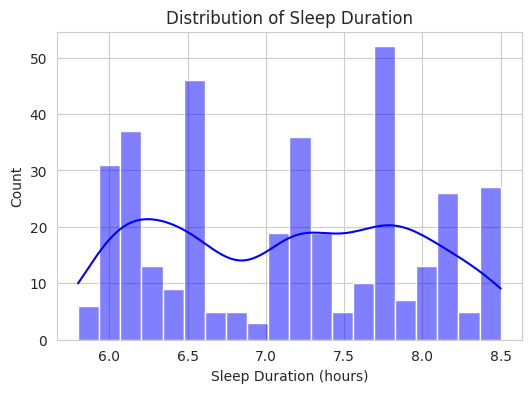

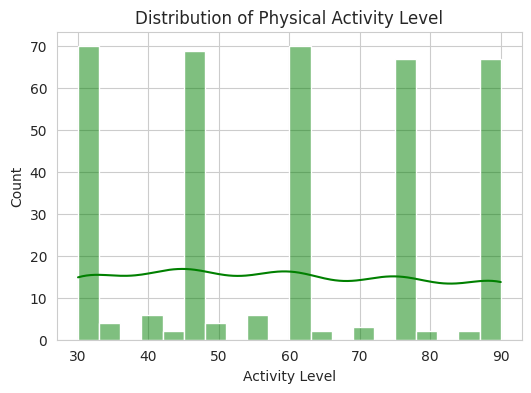

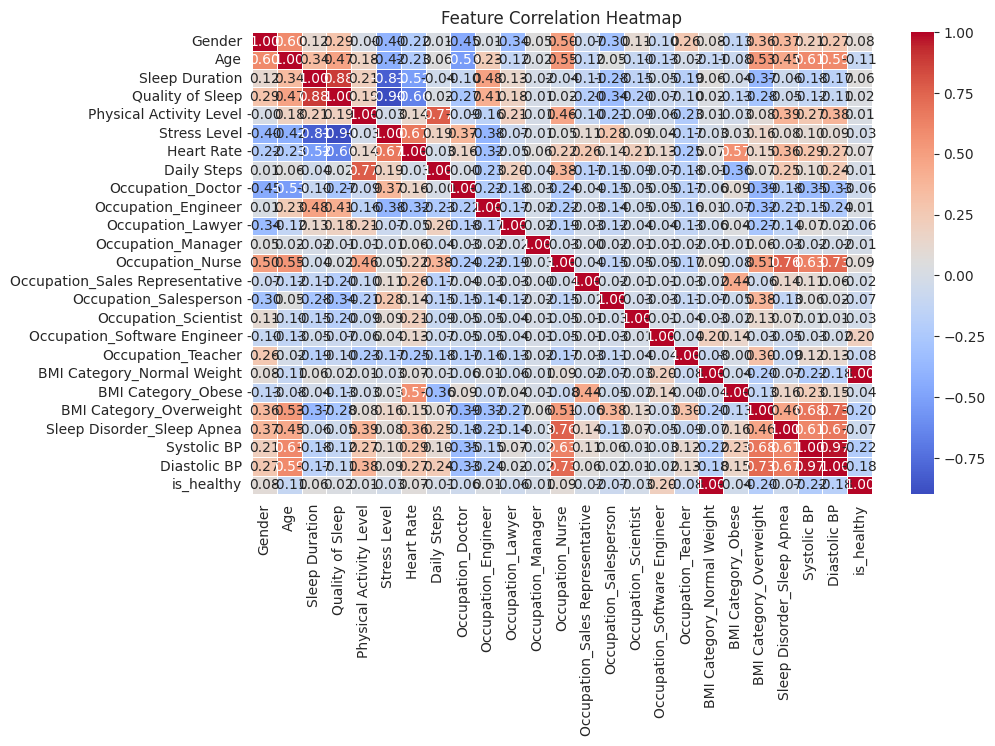

<ipython-input-7-504e6a699887>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["is_healthy"], y=df["Sleep Duration"], palette="Set2")


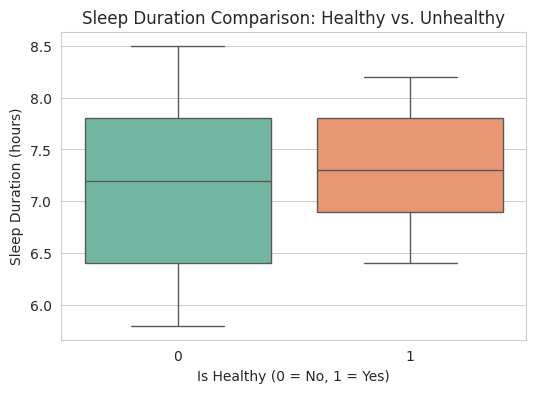

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# 1. Distribution of Sleep Duration
plt.figure(figsize=(6,4))
sns.histplot(df['Sleep Duration'], bins=20, kde=True, color="blue")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.show()

# 2. Distribution of Physical Activity Level
plt.figure(figsize=(6,4))
sns.histplot(df['Physical Activity Level'], bins=20, kde=True, color="green")
plt.title("Distribution of Physical Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Count")
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Boxplot: Comparing Sleep Duration for Healthy vs. Unhealthy
plt.figure(figsize=(6,4))
sns.boxplot(x=df_cleaned["is_healthy"], y=df["Sleep Duration"], palette="Set2")
plt.title("Sleep Duration Comparison: Healthy vs. Unhealthy")
plt.xlabel("Is Healthy (0 = No, 1 = Yes)")
plt.ylabel("Sleep Duration (hours)")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Define feature set (X) and target (y)
X = df_cleaned.drop(columns=['is_healthy'])
y = df_cleaned['is_healthy']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shape
X_train.shape, X_test.shape

((299, 24), (75, 24))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf')

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Display classification report for best model
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))  # Assuming Random Forest performs best

Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 1.0

Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00         2

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



is_healthy
0    353
1     21
Name: count, dtype: int64
is_healthy                         1.000000
BMI Category_Normal Weight         1.000000
Occupation_Software Engineer       0.200466
Occupation_Nurse                   0.085014
Gender                             0.083915
Heart Rate                         0.066138
Sleep Duration                     0.061774
Quality of Sleep                   0.023616
Occupation_Engineer                0.014355
Physical Activity Level            0.013626
Daily Steps                       -0.007575
Occupation_Manager                -0.012629
Occupation_Sales Representative   -0.017884
Occupation_Scientist              -0.025360
Stress Level                      -0.026776
BMI Category_Obese                -0.040427
Occupation_Lawyer                 -0.057430
Occupation_Doctor                 -0.058836
Sleep Disorder_Sleep Apnea        -0.068030
Occupation_Salesperson            -0.074608
Occupation_Teacher                -0.084407
Age                  

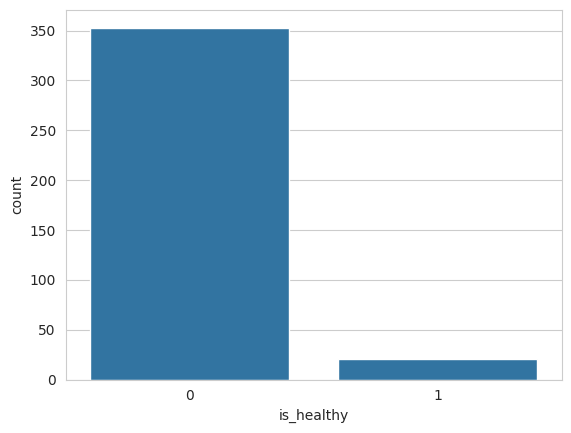

In [10]:
import seaborn as sns

# Count of Healthy vs Unhealthy
sns.countplot(x=y)
print(y.value_counts())  # Print actual counts

import numpy as np

# Correlation check
corr_matrix = df_cleaned.corr()
print(corr_matrix["is_healthy"].sort_values(ascending=False))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

is_healthy
0    353
1    353
Name: count, dtype: int64


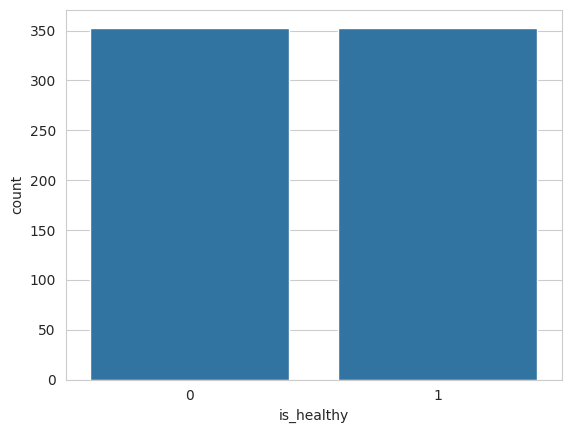

In [11]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new class distribution
sns.countplot(x=y_balanced)
print(y_balanced.value_counts())  # Ensure balanced classes

In [12]:
# Splitting the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Train models again
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate models again
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Display classification report for best model
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))  # Assuming Random Forest performs best

Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 1.0

Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        71

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [14]:
print(X_balanced.columns)

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight',
       'Sleep Disorder_Sleep Apnea', 'Systolic BP', 'Diastolic BP'],
      dtype='object')


In [15]:
# Selecting the correct features
X_vis = X_balanced[['Physical Activity Level', 'Stress Level']]
y_vis = y_balanced

In [19]:
# Select only two features for training
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(
    X_vis, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Train a new Random Forest model on only these two features
rf_vis = RandomForestClassifier(n_estimators=100, random_state=42)
rf_vis.fit(X_vis_train, y_vis_train)

RandomForestClassifier(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


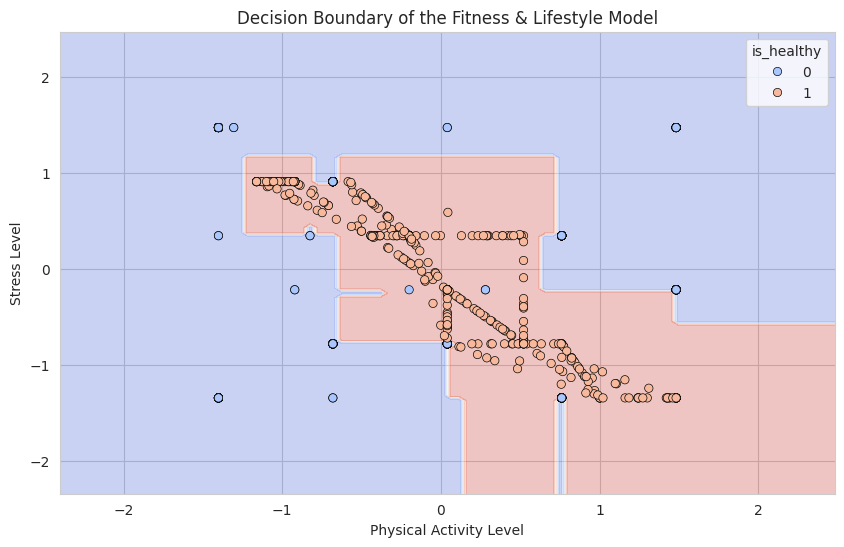

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mesh grid
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on mesh grid using new model
Z = rf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_vis.iloc[:, 0], y=X_vis.iloc[:, 1], hue=y_vis, palette="coolwarm", edgecolor="k")
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.title('Decision Boundary of the Fitness & Lifestyle Model')
plt.show()

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples at leaf node
    'bootstrap': [True, False]  # Sampling method
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Randomized Search with Cross Validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of different parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to find best hyperparameters
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [22]:
# Train optimized model
best_params = random_search.best_params_
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_optimized.predict(X_test)

print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Optimized Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        71

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

